# computing HMP on young subjects data 

This notebook will : 1) load the MNE epochs as HMP objects 2) Normalize & apply dimensionality reduction 3) fit the data to HMP cumulative Model 4) save the results (estimates per trial, sample, event)

## 1) load the MNE epochs as HMP objects

In [ ]:
from functions import pre_hmp
import sys
import os
import numpy as np
import mne
import pickle
from config import data_dir
import hmp

young_adults_ids = [303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]
# Recovering subject files paths
subj_files = [os.path.join(data_dir,'Dnl', f'S{id}_epochs_preHMP.fif') for id in young_adults_ids]  # Create a list of files with full paths
sfreq = 256 
young_adults_ids_str = [str(id) for id in young_adults_ids] # subjects names
epoch_data = hmp.io.read_mne_data(subj_files, sfreq=sfreq, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2, # the function will filter out trials with RTs outside this range
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the metadata of mne epoch in column "RT_Correct_CorrPU" and is in milliseconds
                            verbose=False, subj_name = young_adults_ids_str)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

Processing participant /workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


88 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S303_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


72 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S305_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif's epochs eeg
63 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S306_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S307_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


80 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S308_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif's epochs eeg
60 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S309_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


75 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S310_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif's epochs eeg
58 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S311_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S312_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif's epochs eeg
79 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S313_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S314_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif's epochs eeg
57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S315_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


62 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S316_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif's epochs eeg
73 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S317_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


50 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S318_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif's epochs eeg
57 trials were retained for participant /workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/Dnl/S319_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


## 2) Normalize & apply dimensionality reduction

/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:347: RuntimeWarning: Mean of empty slice
  mean_last_dim = np.nanmean(data.values, axis=-1)


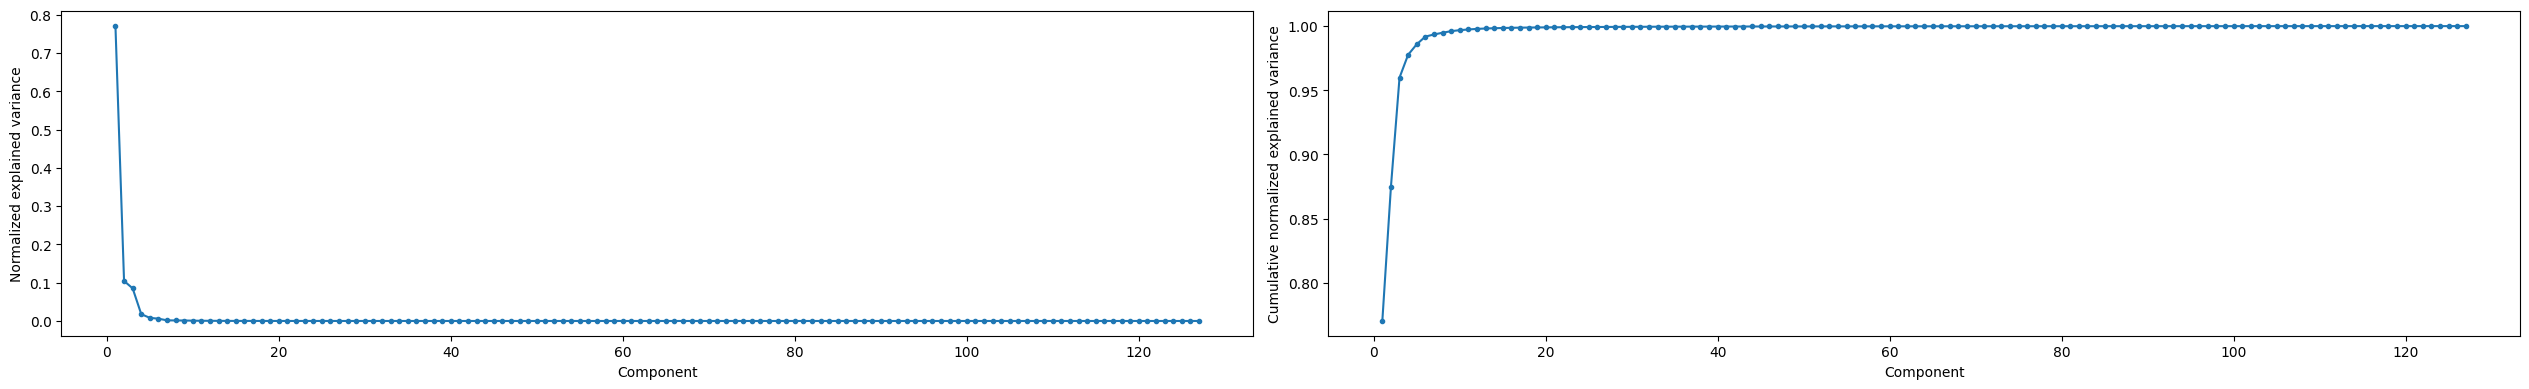

In [ ]:
preprocessed = hmp.preprocessing.Standard(epoch_data) # this will ask you to choose the number of components to keep, I chose 6 for 99% variance explained

## 3) fit the data to HMP cumulative Model


In [ ]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model
model = hmp.models.CumulativeMethod(event_properties)
# fitting and transforming the data
ll_cumulative, estimates_cumulative = model.fit_transform(trial_data)

  0%|          | 0/220 [00:00<?, ?it/s]

Transition event 1 found around time 58.59375
Transition event 2 found around time 351.5625
Transition event 3 found around time 546.875
Transition event 4 found around time 820.3125

All events found, refitting final combination.
Estimating 4 events model


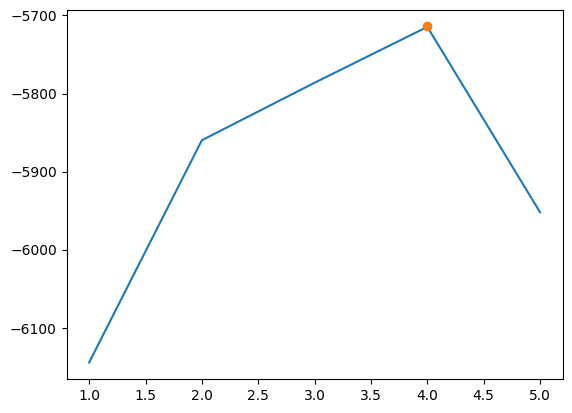

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
model_cumulative = model
cumulative_res = np.array([np.array([model_cumulative.submodels[x].n_events, model_cumulative.submodels[x].lkhs[0]]) for x in model_cumulative.submodels])
plt.plot(cumulative_res[:,0], cumulative_res[:,1])
plt.plot(model_cumulative.final_model.n_events, model_cumulative.final_model.lkhs, 'o', label='Fitted model likelihood')

In [7]:
# save the model estimates
with open(os.path.join(data_dir, 'estimates_cumulative_young.pkl'), 'wb') as f:
    pickle.dump(estimates_cumulative, f)